<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/MovieRatingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    r = pd.read_excel(file)

# **Basic information of the dataset**

In [3]:

# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
r = pd.read_excel(imdb, 'Ratings')
r.tail()

Your Rating Date Rated                 Title Title Type  IMDb Rating  \
2801            9 2019-12-20                Saw II      Movie          6.6   
2802            7 2019-12-20                   Saw      Movie          7.6   
2803            9 2019-12-20                  Cube      Movie          7.1   
2804            5 2019-12-20  Before I Go to Sleep      Movie          6.3   
2805            6 2019-09-29                Hidden      Movie          6.4   

      Runtime (mins)  Year                     Genres  Num Votes  \
2801            93.0  2005            Horror, Mystery     282142   
2802           103.0  2004  Mystery, Horror, Thriller     478305   
2803            90.0  1997    Horror, Mystery, Sci-Fi     251566   
2804            92.0  2014   Mystery, Thriller, Drama      85418   
2805            84.0  2015   Horror, Thriller, Sci-Fi      26565   

             Release Date                Directors  
2801  2005-10-28 00:00:00      Darren Lynn Bousman  
2802  2004-10-29 00:00:00                James Wan  
2803  1997-12-10 00:00:00          Vincenzo Natali  
2804  2014-10-31 00:00:00              Rowan Joffe  
2805  2015-09-15 00:00:00  Matt Duffer,Ross Duffer

In [4]:
# Displaying the number of rows and columns in the dataset:
r.shape

(2806, 11)

In [5]:
# Displaying the datatypes of each column:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2806 non-null   int64         
 1   Date Rated      2806 non-null   datetime64[ns]
 2   Title           2806 non-null   object        
 3   Title Type      2806 non-null   object        
 4   IMDb Rating     2806 non-null   float64       
 5   Runtime (mins)  2788 non-null   float64       
 6   Year            2806 non-null   int64         
 7   Genres          2806 non-null   object        
 8   Num Votes       2806 non-null   int64         
 9   Release Date    2806 non-null   object        
 10  Directors       2777 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 241.3+ KB


In [6]:
# Displaying general statistical information of the dataset:
r.describe()

Your Rating                     Date Rated  IMDb Rating  \
count  2806.000000                           2806  2806.000000   
mean      7.708838  2022-04-12 21:08:35.751960064     6.564932   
min       2.000000            2019-09-29 00:00:00     2.100000   
25%       7.000000            2021-03-18 00:00:00     6.000000   
50%       8.000000            2022-03-25 12:00:00     6.600000   
75%       9.000000            2023-04-13 00:00:00     7.200000   
max      10.000000            2024-10-24 00:00:00     9.700000   
std       1.407279                            NaN     0.938188   

       Runtime (mins)         Year     Num Votes  
count     2788.000000  2806.000000  2.806000e+03  
mean       107.991750  1996.374198  1.296565e+05  
min         21.000000  1922.000000  1.250000e+02  
25%         94.000000  1987.000000  1.259100e+04  
50%        105.000000  1997.000000  4.551450e+04  
75%        118.000000  2008.000000  1.367642e+05  
max        583.000000  2024.000000  2.954816e+06  
std         21.925575    15.404760  2.382377e+05

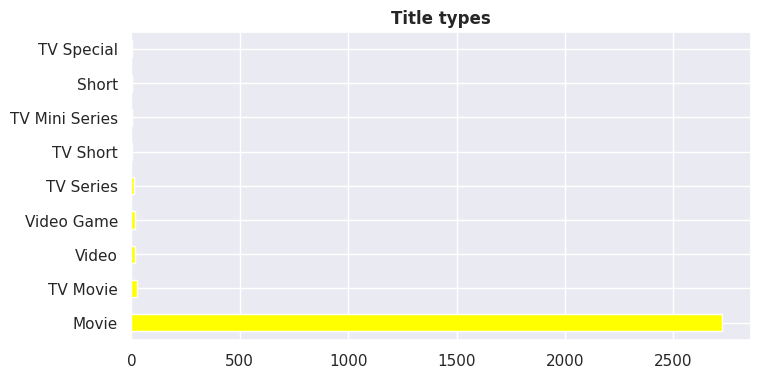

In [12]:
# Displaying the title types present in the dataset:
r['Title Type'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [13]:
# Creating a datetime object based on the dates from the dataset:
r['Date Rated'] = r['Date Rated'].map(pd.to_datetime)
r['Day Rated'] = r['Date Rated'].apply(lambda x : x.day)
r['Month Rated'] = r['Date Rated'].apply(lambda x : x.month)
r['Year Rated'] = r['Date Rated'].apply(lambda x : x.year)

# Displaying the datatypes of each column:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2806 non-null   int64         
 1   Date Rated      2806 non-null   datetime64[ns]
 2   Title           2806 non-null   object        
 3   Title Type      2806 non-null   object        
 4   IMDb Rating     2806 non-null   float64       
 5   Runtime (mins)  2788 non-null   float64       
 6   Year            2806 non-null   int64         
 7   Genres          2806 non-null   object        
 8   Num Votes       2806 non-null   int64         
 9   Release Date    2806 non-null   object        
 10  Directors       2777 non-null   object        
 11  Day Rated       2806 non-null   int64         
 12  Month Rated     2806 non-null   int64         
 13  Year Rated      2806 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
me

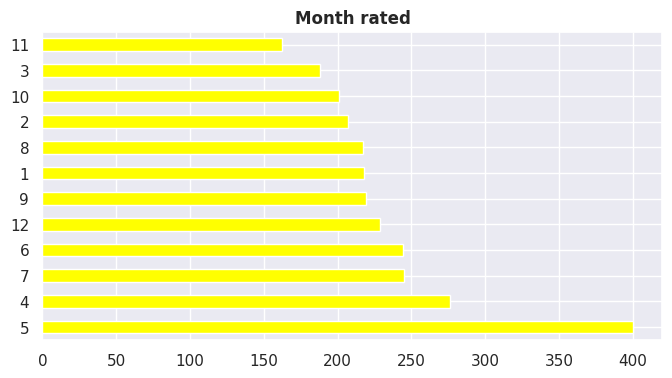

In [14]:
# Displaying distibution of months in which movies were added to the dataset:
r['Month Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Month rated', fontweight = 'bold')
plt.show()

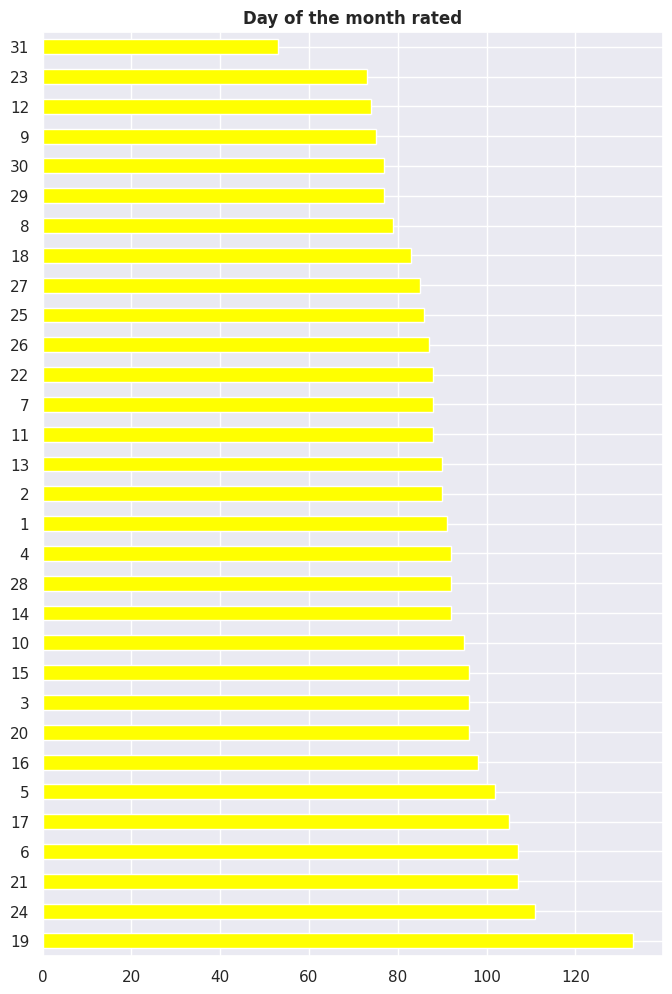

In [15]:
# Displaying distibution of days in which movies were added to the dataset:
r['Day Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Day of the month rated', fontweight = 'bold')
plt.show()

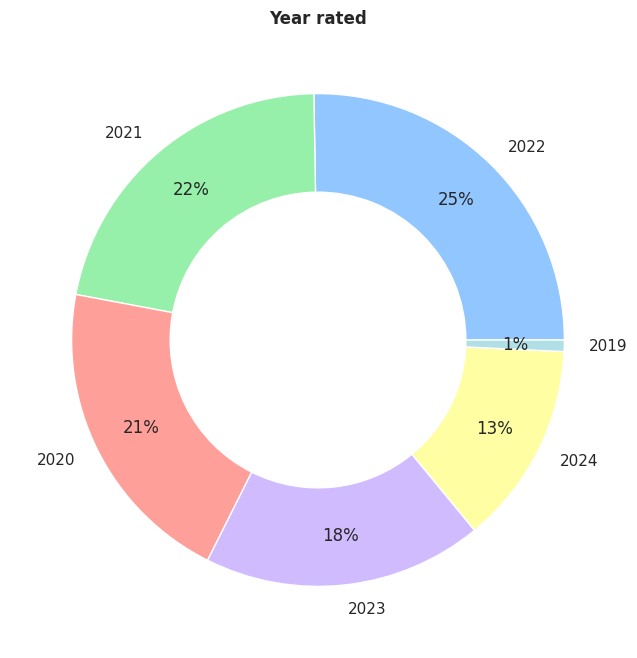

In [16]:
# Displaying distibution of years in which movies were added to the dataset:
r['Year Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year rated', fontweight = 'bold')
plt.show()

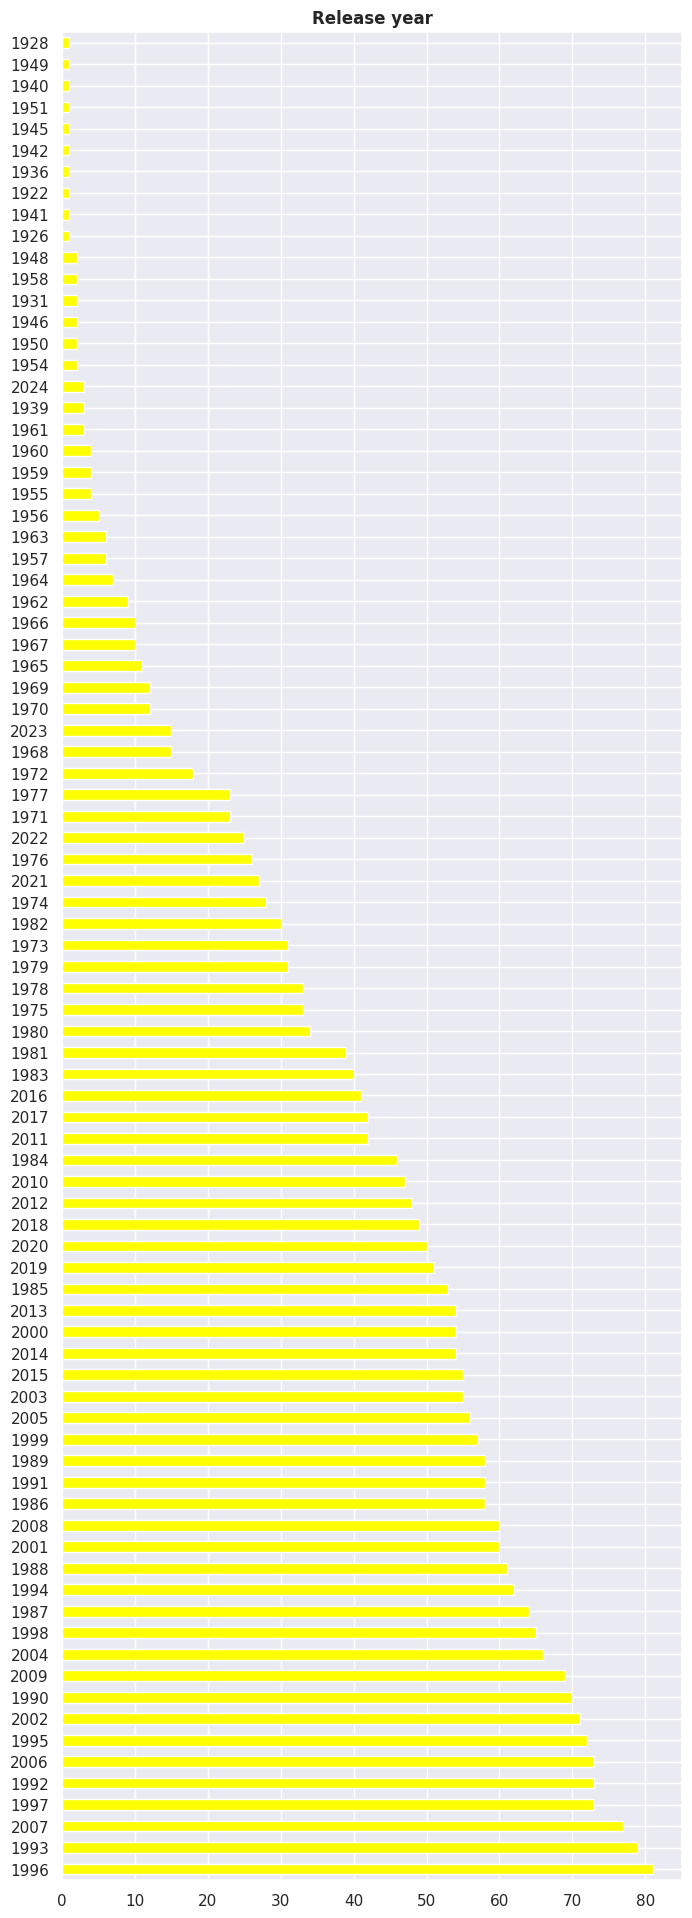

In [17]:
# Displaying distibution of release years in the dataset:
r['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
r['Decade'] = r['Year'].apply(movies_by_decade)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade  
0        2024  2000s  
1        2024  1980s  
2        2024  1980s  
3        2024  1990s  
4        2024  2010s

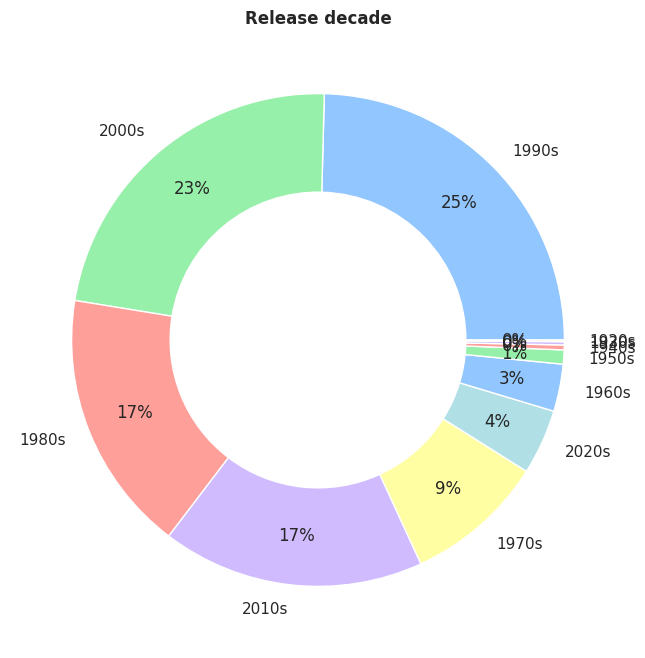

In [19]:
# Displaying the decades the movies were released in:
r['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Release decade', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by quality based on their IMDb rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
r['Quality'] = r['IMDb Rating'].apply(imdb_rating)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade  Quality  
0        2024  2000s     Okay  
1        2024  1980s  Average  
2        2024  1980s  Average  
3        2024  1990s     Okay  
4        2024  2010s     Okay

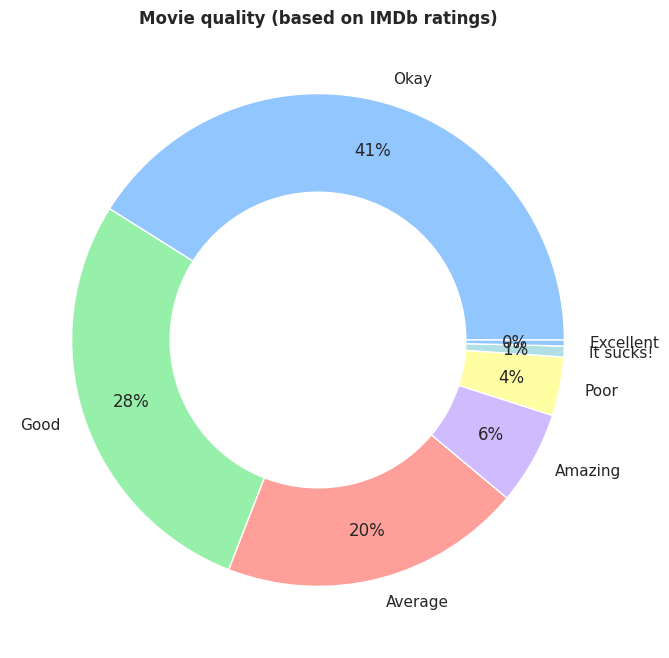

In [21]:
# Displaying the movie rating classification based on the algorithm above:
r['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on IMDb ratings)', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by quality based on the rating I've given:
def my_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
r['Quality'] = r['Your Rating'].apply(my_rating)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade    Quality  
0        2024  2000s  Excellent  
1        2024  1980s    Amazing  
2        2024  1980s    Amazing  
3        2024  1990s       Good  
4        2024  2010s       Good

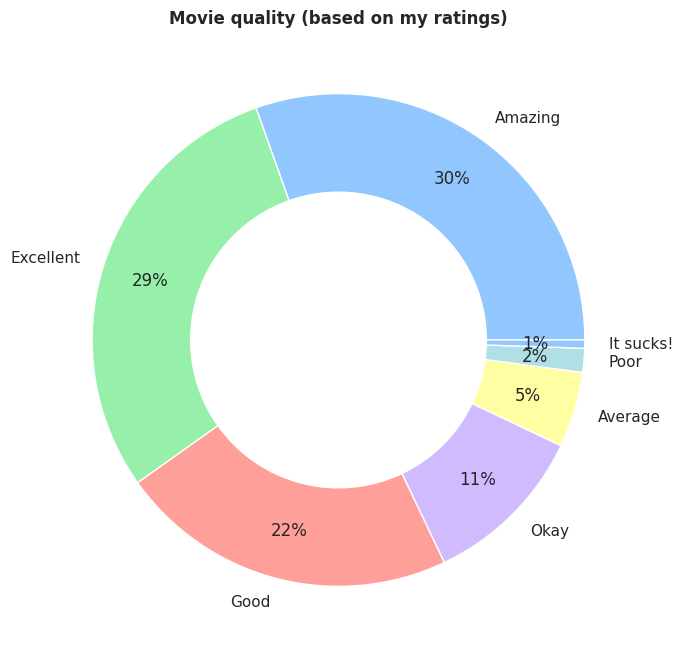

In [23]:
# Displaying the movie rating classification based on the algorithm above:
r['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on my ratings)', fontweight = 'bold')
plt.show()

In [24]:
# Generating an average rating (based on the sum of the IMDb average rating and My Rating):
def average_rating(row):
  imdb_rating = row['IMDb Rating']
  my_rating = row['Your Rating']
  average_rating = (imdb_rating + my_rating) / 2
  return average_rating

# Applying the function above on a column of the dataset and generating a new column as result:
r['Average Rating'] = r.apply(average_rating, axis=1)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade    Quality  Average Rating  
0        2024  2000s  Excellent            7.80  
1        2024  1980s    Amazing            6.95  
2        2024  1980s    Amazing            6.85  
3        2024  1990s       Good            6.80  
4        2024  2010s       Good            6.85

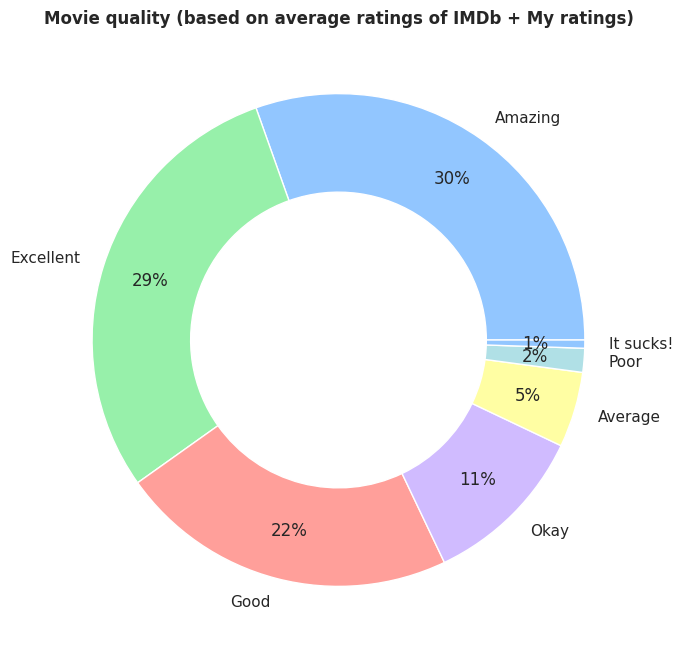

In [25]:
# Displaying the movie rating classification based on the algorithm above:
r['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on average ratings of IMDb + My ratings)', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
r['Movie popularity'] = r['Num Votes'].apply(movie_popularity)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade    Quality  Average Rating     Movie popularity  
0        2024  2000s  Excellent            7.80       Over 10k votes  
1        2024  1980s    Amazing            6.95       Over 10k votes  
2        2024  1980s    Amazing            6.85  Less than 10k votes  
3        2024  1990s       Good            6.80       Over 10k votes  
4        2024  2010s       Good            6.85       Over 10k votes

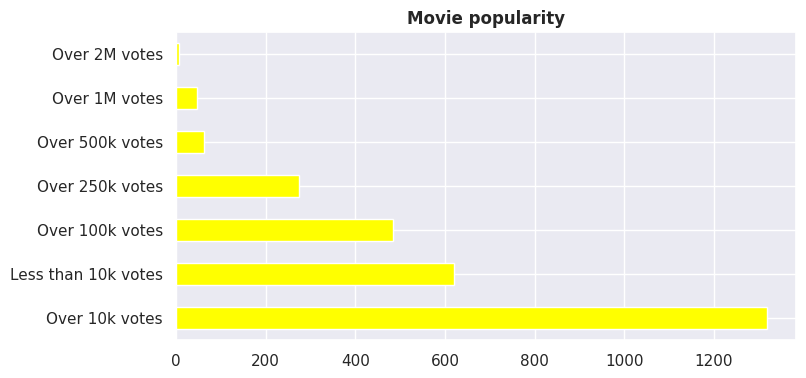

In [28]:
# Displaying the movie popularity based on the algorithm above:
r['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [29]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
r['Movie duration'] = r['Runtime (mins)'].apply(movie_duration)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade    Quality  Average Rating     Movie popularity  \
0        2024  2000s  Excellent            7.80       Over 10k votes   
1        2024  1980s    Amazing            6.95       Over 10k votes   
2        2024  1980s    Amazing            6.85  Less than 10k votes   
3        2024  1990s       Good            6.80       Over 10k votes   
4        2024  2010s       Good            6.85       Over 10k votes   

          Movie duration  
0  Between 1h40 and 1h59  
1  Between 1h40 and 1h59  
2  Between 1h40 and 1h59  
3  Between 2h30 and 2h59  
4    Between 2h and 2h29

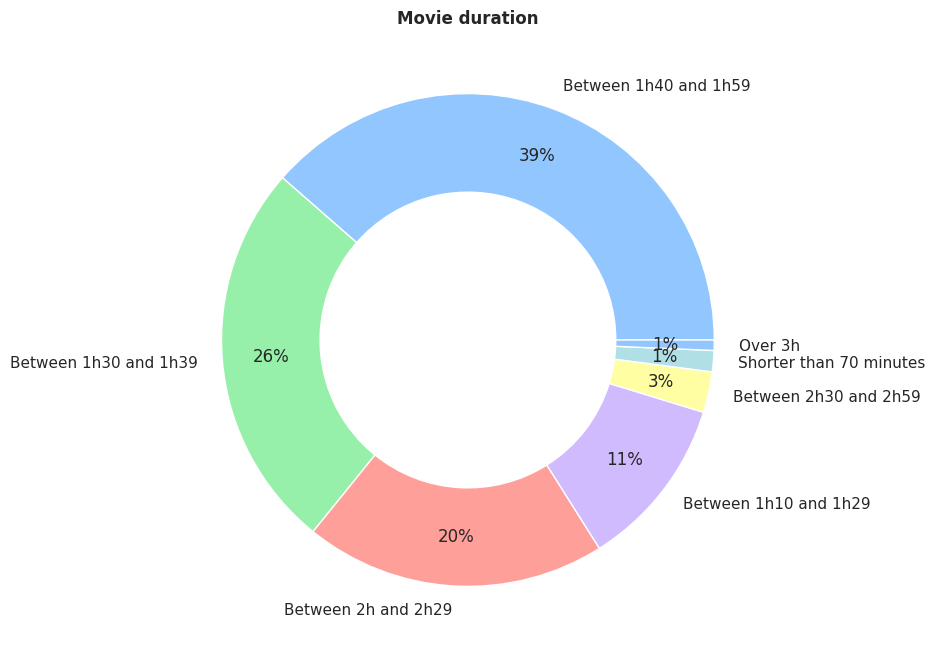

In [30]:
# Displaying the movie duration based on the algorithm above:
r['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [31]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
r['Year Quartile Rated'] = r['Month Rated'].apply(year_quartile)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date          Directors  Day Rated  Month Rated  \
0      77033  2005-11-11 00:00:00  Mikael HÃ¥fstrÃ¶m         24           10   
1      12882  1989-10-20 00:00:00         John Irvin         23           10   
2       1590  1983-09-30 00:00:00     John Mackenzie         22           10   
3      41998  1997-11-21 00:00:00     Clint Eastwood         21           10   
4      31390  2019-11-01 00:00:00       Kasi Lemmons         20           10   

   Year Rated Decade    Quality  Average Rating     Movie popularity  \
0        2024  2000s  Excellent            7.80       Over 10k votes   
1        2024  1980s    Amazing            6.95       Over 10k votes   
2        2024  1980s    Amazing            6.85  Less than 10k votes   
3        2024  1990s       Good            6.80       Over 10k votes   
4        2024  2010s       Good            6.85       Over 10k votes   

          Movie duration Year Quartile Rated  
0  Between 1h40 and 1h59              Fourth  
1  Between 1h40 and 1h59              Fourth  
2  Between 1h40 and 1h59              Fourth  
3  Between 2h30 and 2h59              Fourth  
4    Between 2h and 2h29              Fourth

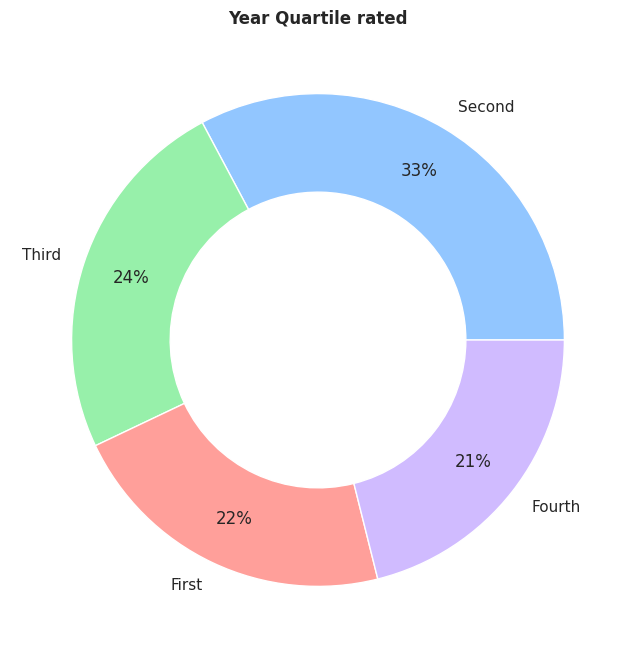

In [32]:
# Displaying the quartile the movie was added based on the algorithm above:
r['Year Quartile Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile rated', fontweight = 'bold')
plt.show()

In [33]:
# Classifying the movies by the month half rated based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
r['Month Half Rated'] = r['Day Rated'].apply(month_half)
r.head()

Your Rating Date Rated                                    Title Title Type  \
0            9 2024-10-24                                 Derailed      Movie   
1            8 2024-10-23                              Next of Kin      Movie   
2            8 2024-10-22                      The Honorary Consul      Movie   
3            7 2024-10-21  Midnight in the Garden of Good and Evil      Movie   
4            7 2024-10-20                                  Harriet      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          6.6           108.0  2005             Drama, Thriller, Crime   
1          5.9           108.0  1989     Drama, Crime, Thriller, Action   
2          5.7           104.0  1983           Drama, Romance, Thriller   
3          6.6           155.0  1997    Mystery, Thriller, Crime, Drama   
4          6.7           125.0  2019  Biography, Drama, History, Action   

   Num Votes         Release Date  ... Day Rated  Month Rated  Year Rated  \
0      77033  2005-11-11 00:00:00  ...        24           10        2024   
1      12882  1989-10-20 00:00:00  ...        23           10        2024   
2       1590  1983-09-30 00:00:00  ...        22           10        2024   
3      41998  1997-11-21 00:00:00  ...        21           10        2024   
4      31390  2019-11-01 00:00:00  ...        20           10        2024   

   Decade    Quality Average Rating     Movie popularity  \
0   2000s  Excellent           7.80       Over 10k votes   
1   1980s    Amazing           6.95       Over 10k votes   
2   1980s    Amazing           6.85  Less than 10k votes   
3   1990s       Good           6.80       Over 10k votes   
4   2010s       Good           6.85       Over 10k votes   

          Movie duration Year Quartile Rated Month Half Rated  
0  Between 1h40 and 1h59              Fourth           Second  
1  Between 1h40 and 1h59              Fourth           Second  
2  Between 1h40 and 1h59              Fourth           Second  
3  Between 2h30 and 2h59              Fourth           Second  
4    Between 2h and 2h29              Fourth           Second  

[5 rows x 21 columns]

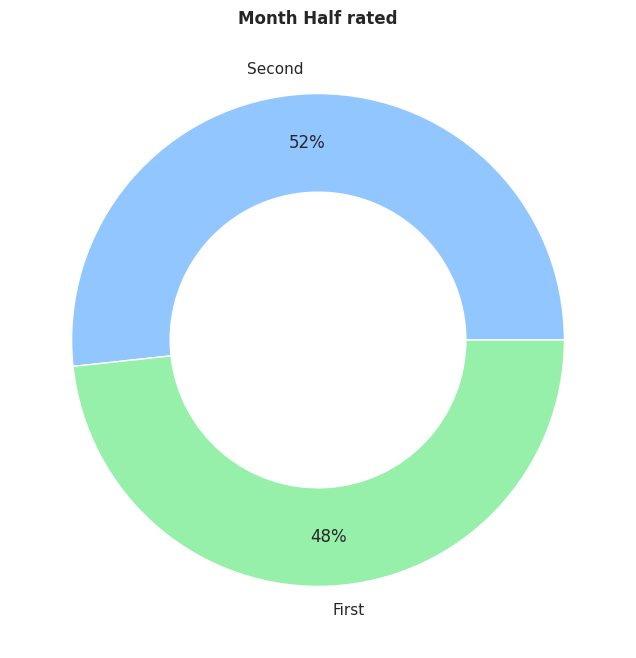

In [34]:
# Displaying the month half the movie was added based on the algorithm above:
r['Month Half Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half rated', fontweight = 'bold')
plt.show()

In [35]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Check the data type of the 'Genres' column
if r['Genres'].dtype != 'str':
    r['Genres'] = r['Genres'].astype(str)

# Splitting the genres by comma and removing leading spaces:
r['Genres'] = r['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
r = r.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = r.index, columns = r['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [36]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action        2067   739
Adventure     2386   420
Animation     2742    64
Biography     2636   170
Comedy        2236   570
Crime         1938   868
Documentary   2797     9
Drama         1144  1662
Family        2627   179
Fantasy       2603   203
Film-Noir     2800     6
History       2707    99
Horror        2263   543
Music         2753    53
Musical       2774    32
Mystery       2236   570
Romance       2456   350
Sci-Fi        2556   250
Short         2802     4
Sport         2689   117
Thriller      1406  1400
War           2686   120
Western       2714    92


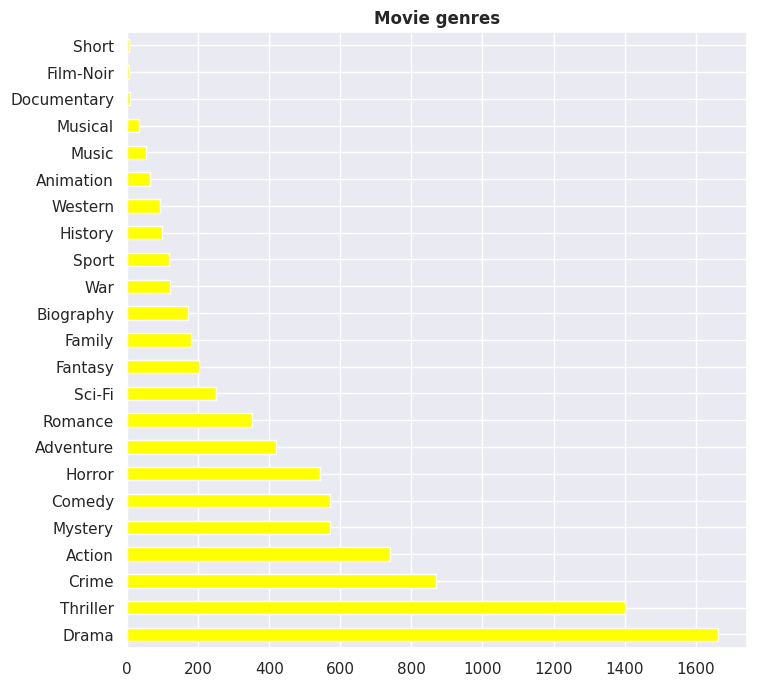

In [37]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [38]:
# Splitting the directors by comma and removing leading spaces:
r['Directors'] = r['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
r = r.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = r.index, columns = r['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

TypeError: 'float' object is not iterable

In [ ]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                 False  True
Aaron Hann        2572     0
Aaron Harvey      2572     0
Aaron Moorhead    2572     0
Aaron Woodley     2572     0
Abel Ferrara      2569     0
...                ...   ...
Yuval Adler       2572     0
Zach Cregger      2572     0
Zachary Donohue   2572     0
Zack Snyder       2572     0
Zak Hilditch      2571     0

[1380 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


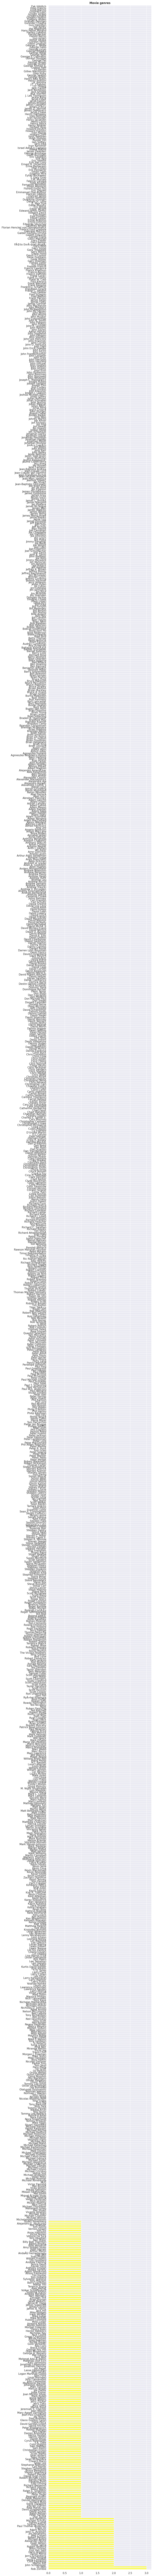

In [ ]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 200))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()